In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
var = pd.read_csv("../Downloads/Datasets/rentalHouses.csv")

In [3]:
var.head()

,id,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [4]:
df = var.copy()

In [5]:
df.isnull().sum()

id                0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [7]:
df['id'].duplicated().sum()

0

# Data Cleaning

In [8]:
# Removing unwanted columns from the dataframe

df.drop(['id', 'floor'], axis=1, inplace = True)

In [9]:
# Using regex to remove unwanted characters from columns.

df['rent amount'] = df['rent amount'].str.replace(r'R\$', '', regex=True)

df['property tax'] = df['property tax'].str.replace(r'R\$', '', regex=True)

df['fire insurance'] = df['fire insurance'].str.replace(r'R\$', '', regex=True)

df['total'] = df['total'].str.replace(r'R\$', '', regex=True)

df['hoa'] = df['hoa'].str.replace(r'R\$', '', regex=True)

df.rename(columns={'hoa':'house allowance'}, inplace = True)

In [10]:
replaceValues = {'acept' : 1, 'not acept' : 0}
df['animal'] = df['animal'].apply(lambda x: replaceValues[x] if x in replaceValues else x)

replaceFurn = {'furnished' : 1, 'not furnished' : 0}
df['furniture'] = df['furniture'].apply(lambda x : replaceFurn[x] if x in replaceFurn else x)

In [11]:
df.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,house allowance,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,1,1,0,"8,000","1,000",121,"9,121"
1,0,64,2,1,1,1,0,540,820,122,11,"1,493"
2,1,443,5,5,4,1,1,"4,172","7,000","1,417",89,"12,680"
3,1,73,2,2,1,1,0,700,"1,250",150,16,"2,116"
4,1,19,1,1,0,0,0,0,"1,200",41,16,"1,257"


# Changing Datatypes to int

In [12]:
df.rename(columns={'house allowance' : 'houseAllowance'}, inplace = True)

In [13]:
df['houseAllowance'] = df['houseAllowance'].str.replace("Sem info", "2154")

df['houseAllowance'] = df['houseAllowance'].str.replace(",", "")

df['houseAllowance'] = df['houseAllowance'].str.replace("Incluso", "3657")

df['houseAllowance'] = pd.to_numeric(df['houseAllowance'])

In [14]:
df['rent amount'] = df['rent amount'].str.replace(",", "")

df['rent amount'] = pd.to_numeric(df['rent amount'])

In [15]:
df['property tax'] = df['property tax'].str.replace(",", "")

df['property tax'] = df['property tax'].str.replace("Incluso", "3657")

df['property tax'] = pd.to_numeric(df['property tax'])

In [16]:
df['fire insurance'] = pd.to_numeric(df['fire insurance'])

In [17]:
df['total'] = df['total'].str.replace(",", "")

df['total'] = pd.to_numeric(df['total'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   animal          6080 non-null   int64
 6   furniture       6080 non-null   int64
 7   houseAllowance  6080 non-null   int64
 8   rent amount     6080 non-null   int64
 9   property tax    6080 non-null   int64
 10  fire insurance  6080 non-null   int64
 11  total           6080 non-null   int64
dtypes: int64(12)
memory usage: 570.1 KB


# Outlier Detection and Removal

{'whiskers': [<matplotlib.lines.Line2D at 0x18ed51b5190>,
 'caps': [<matplotlib.lines.Line2D at 0x18ed51b56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18ed5196eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x18ed51b5c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x18ed51b5eb0>],
 'means': []}

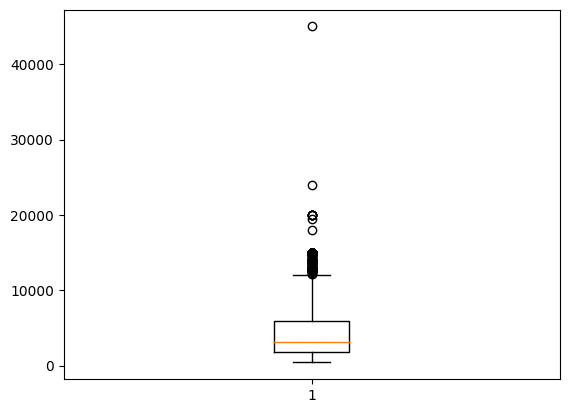

In [19]:
a = df['rent amount']
plt.boxplot(a)

<Axes: xlabel='rent amount'>

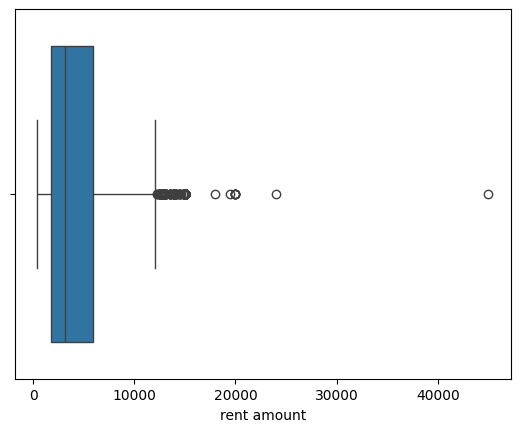

In [20]:
sns.boxplot(x='rent amount', data=df)

In [21]:
print(df['rent amount'].mode())

0    15000
Name: rent amount, dtype: int64


In [22]:
df1 = df[df['rent amount'] < 7500 ]

<Axes: xlabel='rent amount'>

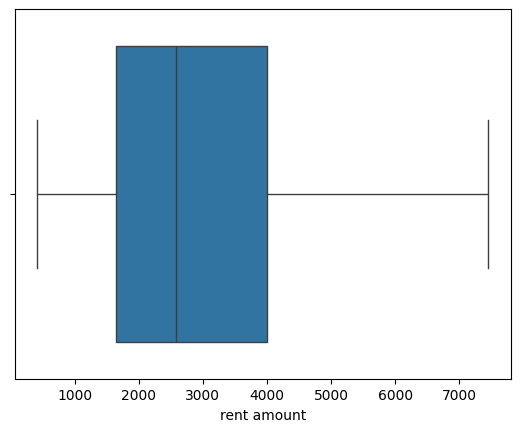

In [23]:
sns.boxplot(x='rent amount', data=df1)

# Normalization

In [24]:
#objectColumns = ['house allowance',	'rent amount',	'property tax',	'fire insurance',	'total']

#for column in objectColumns:
#    df[column] = df[column].replace('[^\d.]', '', regex=True).astype(float)

objectColumns = ['houseAllowance', 'rent amount', 'property tax', 'fire insurance', 'total']

for column in objectColumns:
    df[column] = pd.to_numeric(df[column].replace('[^\d.]', '', regex=True), errors='coerce')


In [25]:
dfNorm = (df-df.min())/(df.max()-df.min())

In [26]:
dfNorm.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,property tax,fire insurance,total
0,1.0,0.009351,0.222222,0.222222,0.333333,1.0,1.0,0.000000,0.170031,0.002730,0.175074,0.022742
1,0.0,0.002195,0.111111,0.000000,0.083333,1.0,0.0,0.002455,0.008973,0.000333,0.011869,0.002239
2,1.0,0.017604,0.444444,0.444444,0.333333,1.0,1.0,0.018964,0.147600,0.003868,0.127596,0.032308
3,1.0,0.002561,0.111111,0.111111,0.083333,1.0,0.0,0.003182,0.018618,0.000410,0.019288,0.003914
4,1.0,0.000366,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.017497,0.000112,0.019288,0.001605


In [27]:
dfNorm.to_csv("C:/Users/KASYAP KRISHNA/Downloads/normData.csv", index=False)

# Standardization

In [28]:
std_scaler = StandardScaler()
 

dfScaled = std_scaler.fit_transform(df.to_numpy())
dfScaled = pd.DataFrame(dfScaled, columns=['city',	'area',	'rooms',	'bathroom',	'parking spaces',	'animal',	'furniture',	'houseAllowance',	'rent amount',	'property tax', 	'fire insurance',	'total'])

In [29]:
dfScaled.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,property tax,fire insurance,total
0,0.397889,0.236616,0.449198,0.457614,1.392098,0.550494,1.686190,-0.295932,1.007768,0.079386,1.273504,0.352867
1,-2.513262,-0.232057,-0.436093,-0.932489,-0.469203,0.550494,-0.593053,-0.160564,-0.999852,-0.061873,-0.957308,-0.518842
2,0.397889,0.777187,2.219781,1.847717,1.392098,0.550494,1.686190,0.749913,0.728155,0.146476,0.624541,0.759580
3,0.397889,-0.208090,-0.436093,-0.237438,-0.469203,0.550494,-0.593053,-0.120455,-0.879618,-0.057368,-0.855908,-0.447647
4,0.397889,-0.351888,-1.321385,-0.932489,-1.089636,-1.816551,-0.593053,-0.295932,-0.893599,-0.074905,-0.855908,-0.545812


# Plots

In [30]:
colList = ['rooms',	'parking spaces', 'houseAllowance',	'rent amount',	'property tax',	'fire insurance',	'total']

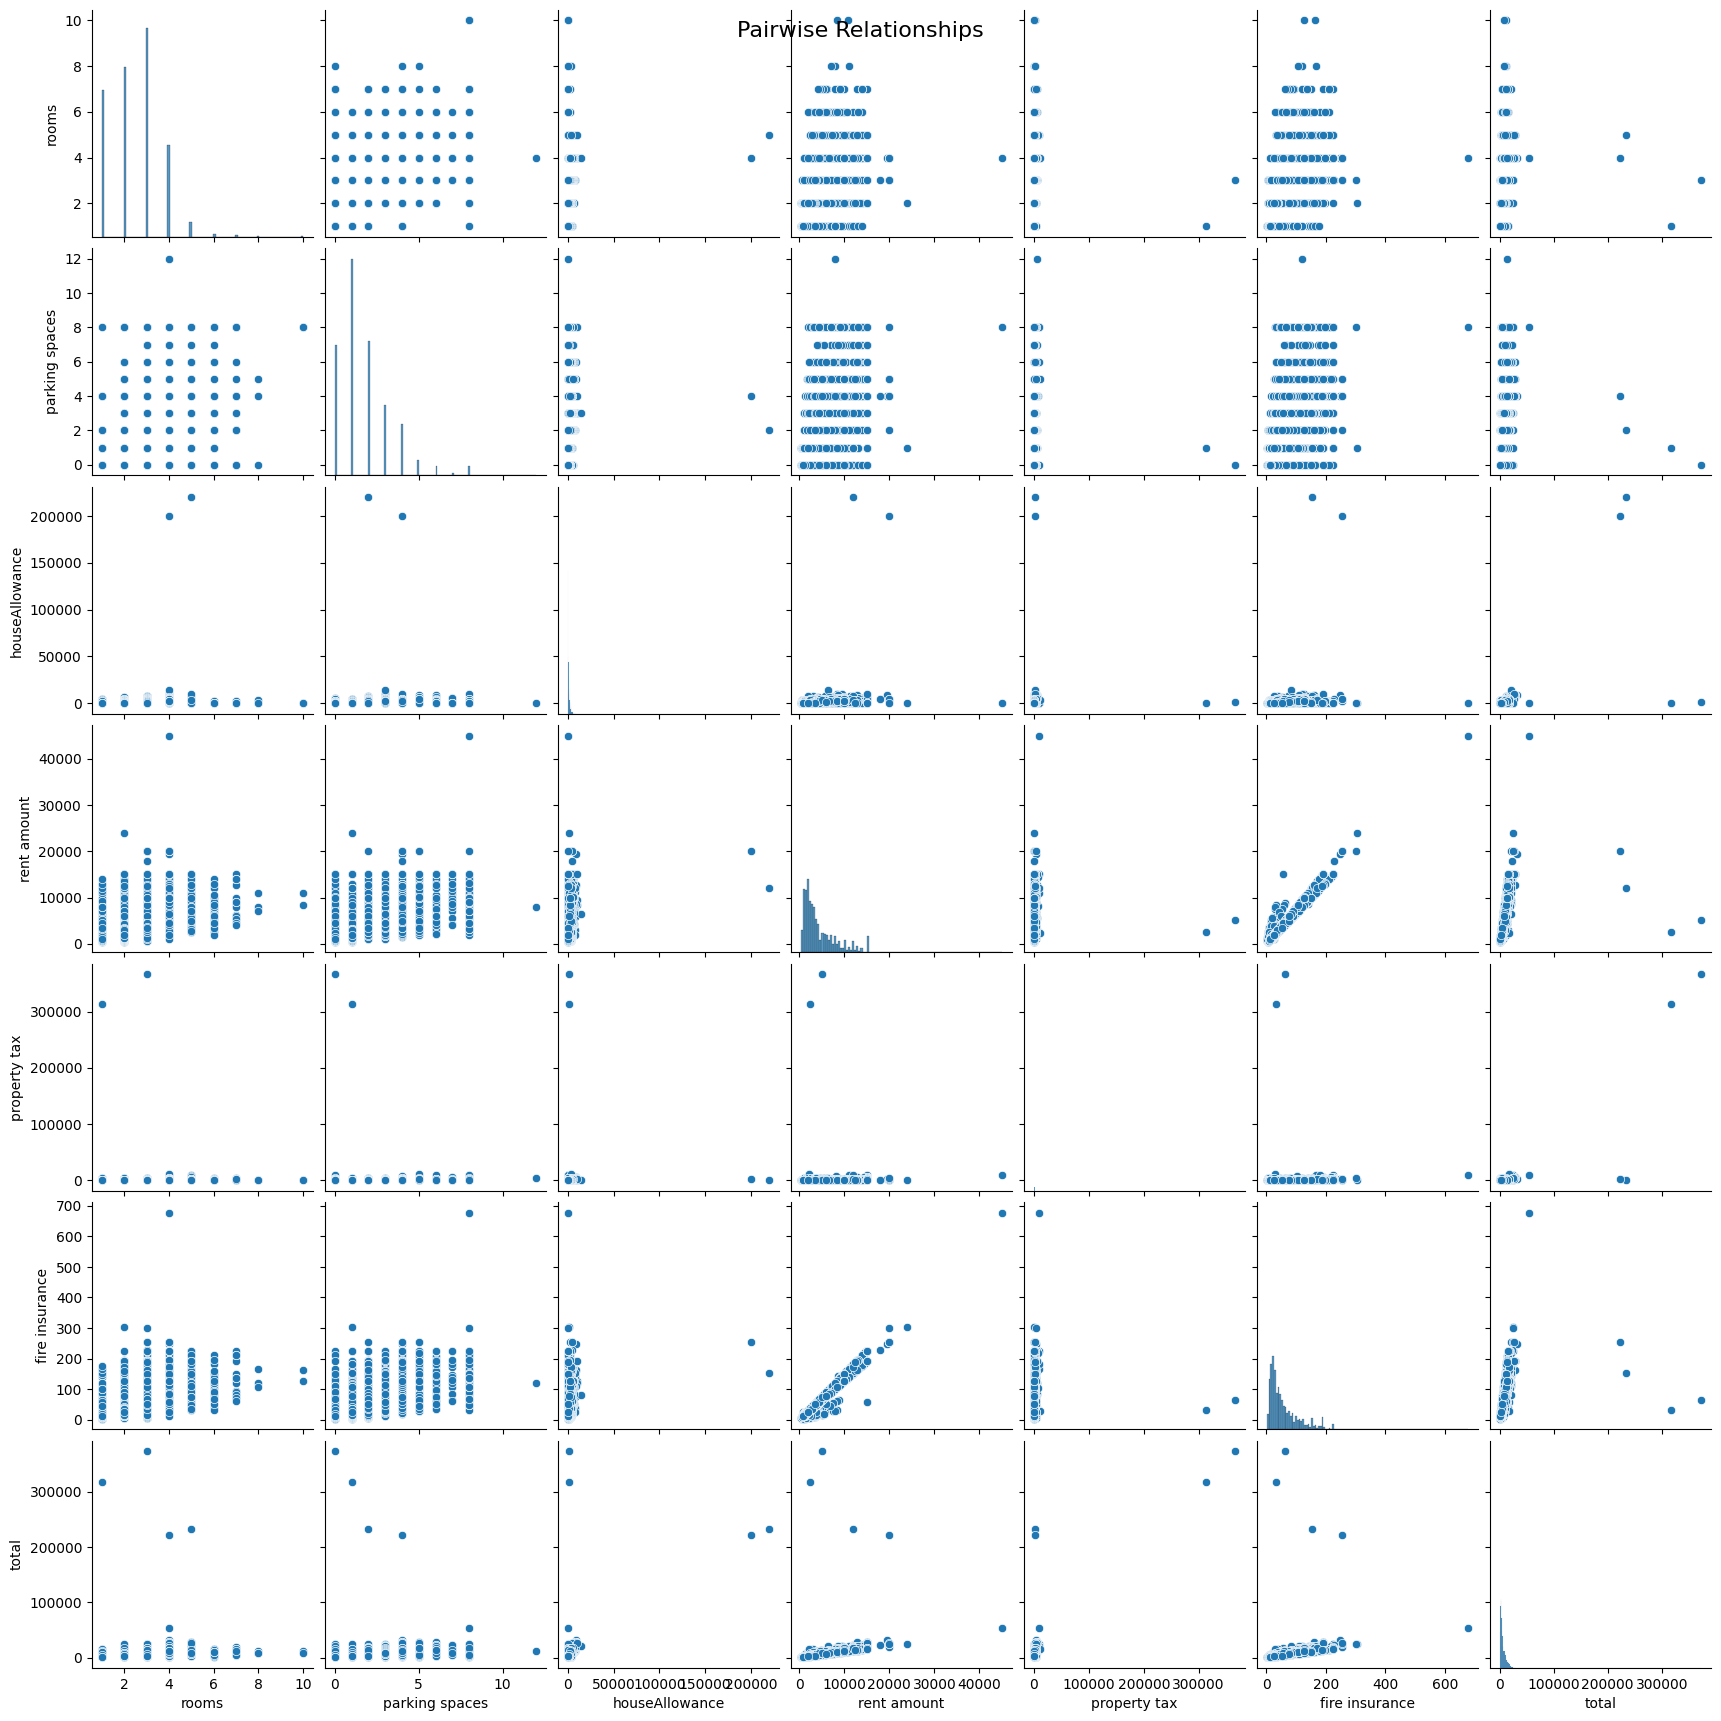

In [31]:
sns.pairplot(df[colList])
plt.suptitle("Pairwise Relationships", fontsize=16)
plt.show()

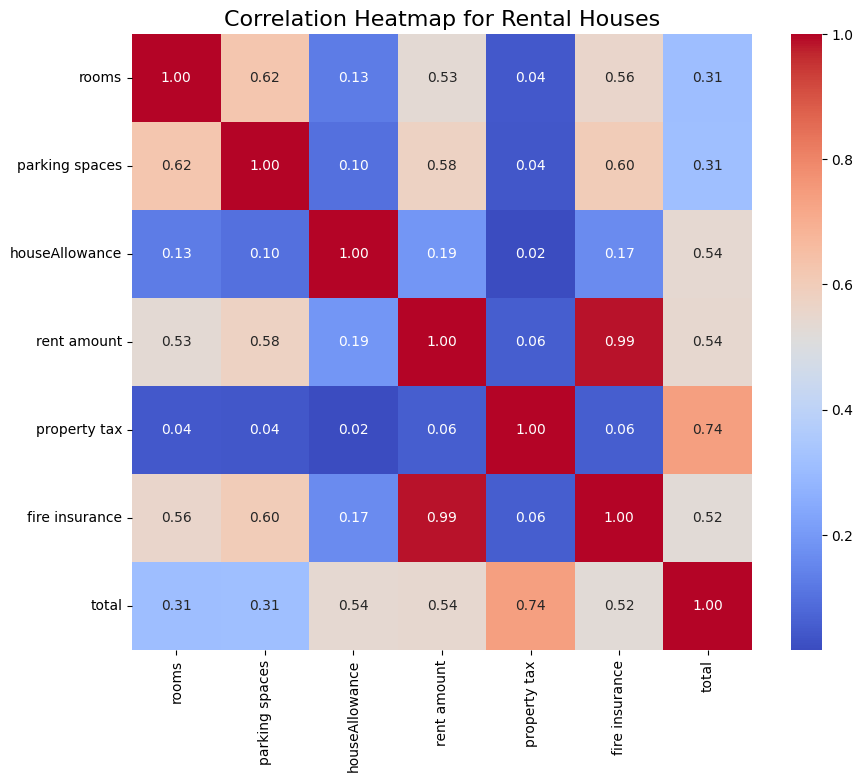

In [32]:
''' Correlation heatmap '''
plt.figure(figsize=(10, 8))
sns.heatmap(df[colList].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Rental Houses", fontsize=16)
plt.show()

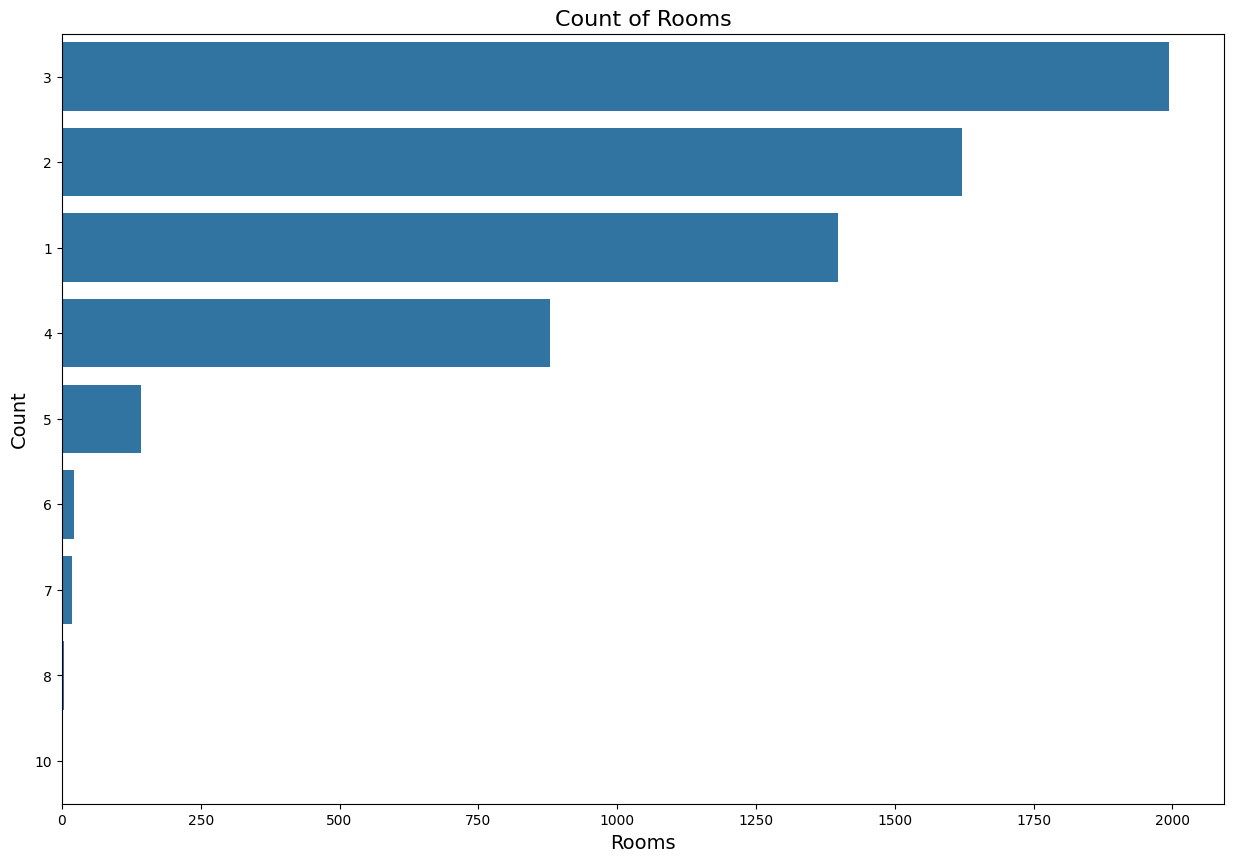

In [33]:
plt.figure(figsize=(15, 10))
sns.countplot(y='rooms', data=df, order=df['rooms'].value_counts().index)
plt.title("Count of Rooms", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Rooms", fontsize=14)
plt.show()

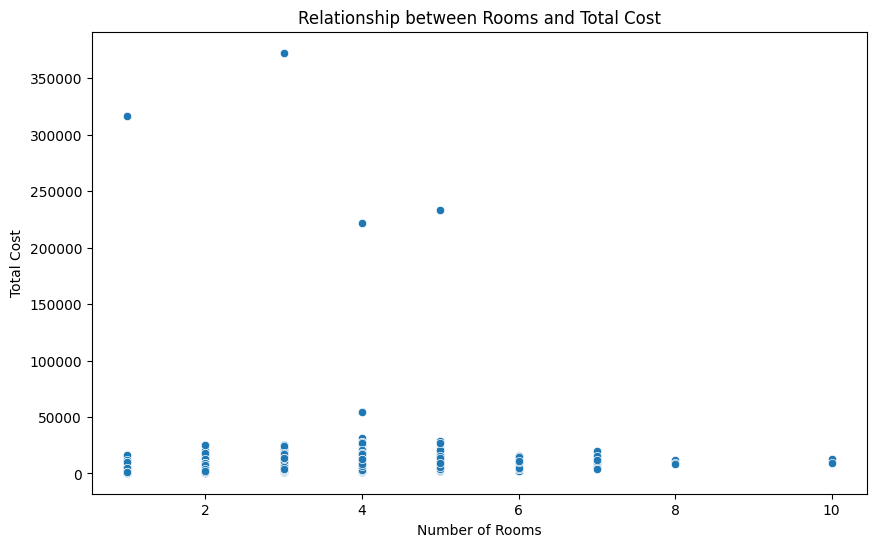

In [34]:
numeric_columns = ['rooms', 'total']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Scatter plot to visualize the relationship between rooms and total cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rooms', y='total', data=df)
plt.title('Relationship between Rooms and Total Cost')
plt.xlabel('Number of Rooms')
plt.ylabel('Total Cost')
plt.show()

In [35]:
df.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,1,0,540,820,122,11,1493
2,1,443,5,5,4,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,1200,41,16,1257


In [36]:
df.to_csv("C:/Users/KASYAP KRISHNA/Downloads/cleanData.csv", index=False)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
data = pd.read_csv('../Downloads/normData.csv')

In [39]:
data.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,houseAllowance,rent amount,property tax,fire insurance,total
0,1.0,0.009351,0.222222,0.222222,0.333333,1.0,1.0,0.000000,0.170031,0.002730,0.175074,0.022742
1,0.0,0.002195,0.111111,0.000000,0.083333,1.0,0.0,0.002455,0.008973,0.000333,0.011869,0.002239
2,1.0,0.017604,0.444444,0.444444,0.333333,1.0,1.0,0.018964,0.147600,0.003868,0.127596,0.032308
3,1.0,0.002561,0.111111,0.111111,0.083333,1.0,0.0,0.003182,0.018618,0.000410,0.019288,0.003914
4,1.0,0.000366,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.017497,0.000112,0.019288,0.001605


In [40]:
data["area"].unique()

array([9.35111400e-03, 2.19547894e-03, 1.76044885e-02, 2.56139210e-03,
       3.65913157e-04, 1.21971052e-04, 1.82956578e-03, 2.92730525e-03,
       8.94454383e-04, 2.03285087e-03, 4.06570174e-04, 1.48398114e-02,
       3.33387543e-03, 1.87022280e-03, 7.23694910e-03, 3.65913157e-03,
       7.39957717e-03, 3.37453244e-03, 5.89526752e-03, 2.84599122e-03,
       2.23613596e-03, 1.26036754e-02, 6.91169296e-03, 8.53797365e-04,
       3.86241665e-03, 1.17905350e-02, 5.69198244e-03, 4.87884209e-03,
       2.43942104e-03, 4.47227191e-03, 9.75768418e-03, 1.62628070e-03,
       3.41518946e-03, 6.74906489e-03, 7.35892015e-03, 6.09855261e-04,
       3.21190437e-02, 1.34168157e-02, 3.25256139e-03, 2.60204911e-02,
       8.94454383e-03, 7.31826313e-03, 7.92811839e-03, 3.49650350e-03,
       1.56936087e-02, 2.60204911e-03, 8.13140348e-04, 1.58562368e-02,
       8.53797365e-03, 3.00861929e-02, 5.28541226e-03, 4.87884209e-04,
       1.36201008e-02, 1.46365263e-03, 1.01642544e-03, 2.52073508e-03,
      

In [41]:
X = data[['area', 'rooms']]
y = data['total']

In [42]:
X['area']

0       0.009351
1       0.002195
2       0.017604
3       0.002561
4       0.000366
          ...   
6075    0.001626
6076    0.003009
6077    0.001545
6078    0.006099
6079    0.002033
Name: area, Length: 6080, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
y_test.count()

1216

In [45]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
type(y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

In [ ]:
X_test